<a href="https://colab.research.google.com/github/HARSHGit45/Machine_Learning_assignment/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df=df.drop('User ID',axis=1)

In [8]:
mp={'Male':0 , 'Female':1}
df['Gender']=df['Gender'].map(mp)


In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [11]:
x=df.iloc[:,:3]
y=df.iloc[:,3]

In [12]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


<Axes: xlabel='Purchased', ylabel='count'>

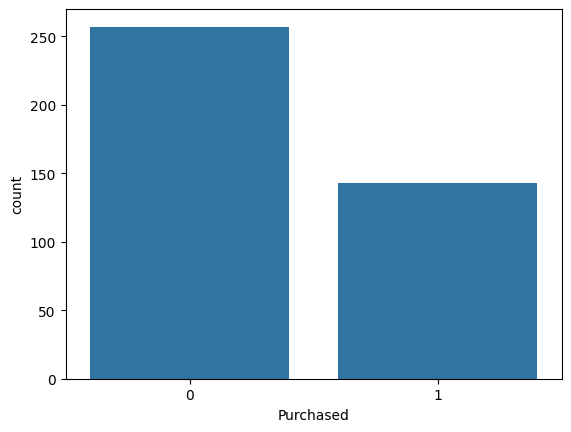

In [13]:
sns.countplot(data=df,x=y)

In [15]:
dt=tree.DecisionTreeClassifier()
s=StandardScaler()
x=s.fit_transform(x)

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [18]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(0.5340909090909091, 0.9545454545454546, 'x[1] <= 0.654\ngini = 0.453\nsamples = 300\nvalue = [196, 104]'),
 Text(0.26704545454545453, 0.8636363636363636, 'x[2] <= 0.61\ngini = 0.251\nsamples = 217\nvalue = [185, 32]'),
 Text(0.125, 0.7727272727272727, 'x[1] <= -0.11\ngini = 0.063\nsamples = 184\nvalue = [178, 6]'),
 Text(0.10227272727272728, 0.6818181818181818, 'gini = 0.0\nsamples = 128\nvalue = [128, 0]'),
 Text(0.14772727272727273, 0.6818181818181818, 'x[2] <= 0.14\ngini = 0.191\nsamples = 56\nvalue = [50, 6]'),
 Text(0.06818181818181818, 0.5909090909090909, 'x[1] <= -0.015\ngini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(0.045454545454545456, 0.5, 'x[2] <= -0.11\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.022727272727272728, 0.4090909090909091, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.06818181818181818, 0.4090909090909091, 'x[2] <= 0.037\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.045454545454545456, 0.3181818181818182, 'gini = 0.0\nsamples

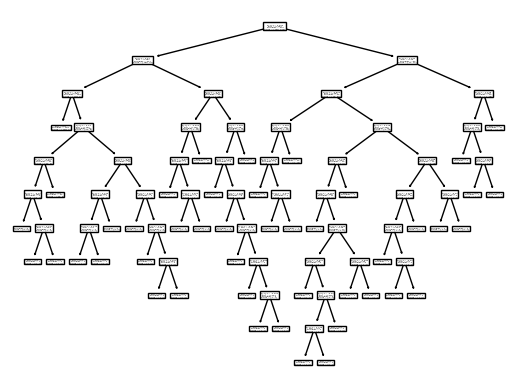

In [19]:
tree.plot_tree(dt)

In [20]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("sn")

'sn.pdf'

In [21]:
pred=dt.predict(xtest)

In [22]:
pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [24]:
cm=confusion_matrix(pred,ytest)
cm

array([[52,  9],
       [ 9, 30]])

<Axes: >

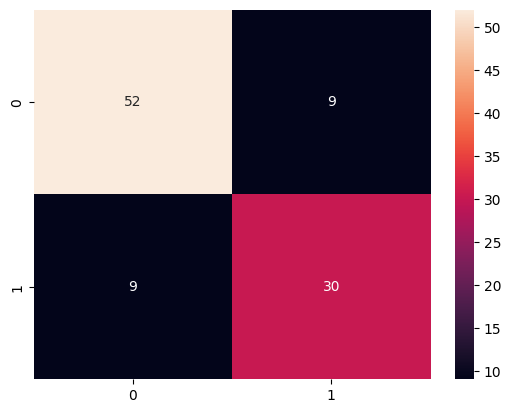

In [26]:
sns.heatmap(cm,annot=True)

In [28]:
acc=accuracy_score(pred,ytest)
acc

0.82